### **Importación de Librerías**

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold


### **Carga del Dataset**

In [75]:
df = pd.read_csv('dataset/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### **Análisis Exploratorio de Datos (EDA)**

Dimensiones del dataset: (8124, 23)

Distribución de la variable objetivo:
class
e    4208
p    3916
Name: count, dtype: int64


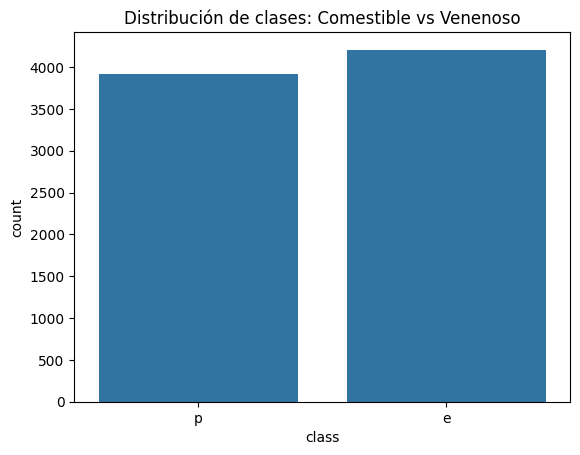

In [94]:
print(f"Dimensiones del dataset: {df.shape}")
print("\nDistribución de la variable objetivo:")
print(df['class'].value_counts())

sns.countplot(data=df, x='class')
plt.title('Distribución de clases: Comestible vs Venenoso')
plt.show()

In [77]:
# Revisión de valores únicos
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### **Preprocesamiento y Codificación**

In [78]:
# Todos los atributos son categóricos, por lo que usaremos LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Revisión
df_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### **División de Datos**

In [79]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")


Tamaño de entrenamiento: (6499, 22)
Tamaño de prueba: (1625, 22)


## **Modelo Naive Bayes**

### **Entrenamiento del modelo**

In [80]:
modelNB = CategoricalNB()
modelNB.fit(X_train, y_train)

# Predicciones
y_pred_NB = modelNB.predict(X_test)


### **Evaluación del modelo**

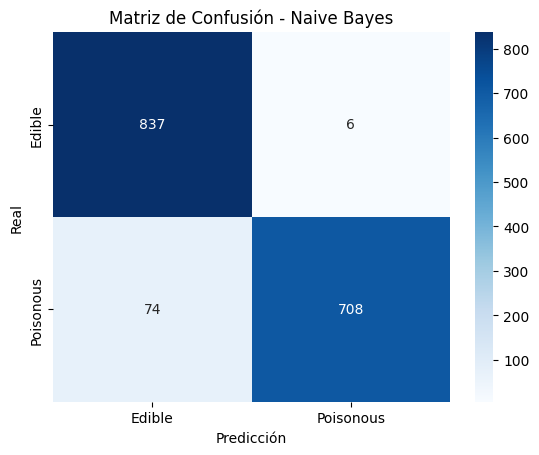


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Accuracy Naive Bayes: 95.08%


In [88]:
cm_nb = confusion_matrix(y_test, y_pred_NB)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# Reporte 
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_NB))

# Accuracy
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"\nAccuracy Naive Bayes: {accuracy_NB*100:.2f}%")


### **Validación Cruzada - Naive Bayes**

In [90]:
# Usamos StratifiedKFold para mantener la proporción de clases
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la validación cruzada
scores_NB = cross_val_score(CategoricalNB(), X, y, cv=cv_strategy, scoring='accuracy')
print(f"Accuracy promedio: {np.mean(scores_NB)*100:.2f}%")
print(f"Desviación estándar: {np.std(scores_NB)*100:.2f}%")
print(f"Puntuaciones: {[f'{score*100:.2f}%' for score in scores_NB]}")


Accuracy promedio: 95.27%
Desviación estándar: 0.66%
Puntuaciones: ['95.02%', '95.88%', '95.57%', '94.09%', '95.81%']


## **Modelo Random Forest**

### **Entrenamiento del modelo**

In [83]:
modelRF = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42, n_jobs=-1)
modelRF.fit(X_train, y_train)

#Predicciones
y_pred_RF = modelRF.predict(X_test)

### **Evaluación del modelo**

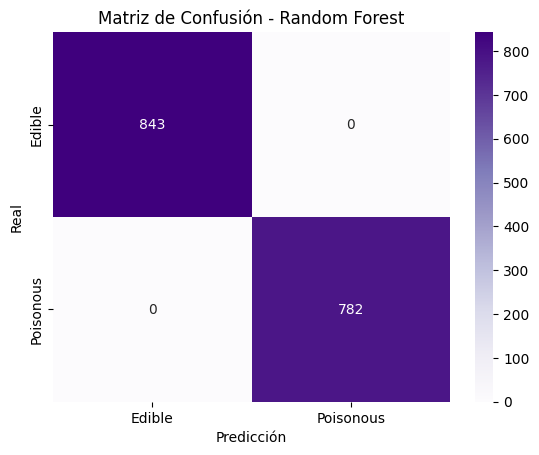


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


 Accuracy Random Forest: 100.00%


In [84]:
cm_rf = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Reporte
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_RF))

# Accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"\n Accuracy Random Forest: {accuracy_RF*100:.2f}%")

### **Validación Cruzada - Random Forest**

In [89]:
# Random Forest
scores_RF = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), X, y, cv=cv_strategy, scoring='accuracy')
print(f"Accuracy promedio: {np.mean(scores_RF)*100:.2f}%")
print(f"Desviación estándar: {np.std(scores_RF)*100:.2f}%")
print(f"Puntuaciones: {[f'{score*100:.2f}%' for score in scores_RF]}")

Accuracy promedio: 100.00%
Desviación estándar: 0.00%
Puntuaciones: ['100.00%', '100.00%', '100.00%', '100.00%', '100.00%']


### **Prueba con Ejemplo Real - Comparación de Modelos**

In [93]:
# Seleccionamos el mismo hongo para comparar predicciones
ejemplo = X.sample(1, random_state=1)
clase_real = y.loc[ejemplo.index[0]]

# Predicciones de ambos modelos
pred_NB = modelNB.predict(ejemplo)[0]
pred_RF = modelRF.predict(ejemplo)[0]

# Probabilidades (más informativo)
prob_NB = modelNB.predict_proba(ejemplo)[0]
prob_RF = modelRF.predict_proba(ejemplo)[0]

print(f"Hongo seleccionado: {ejemplo.values.flatten()}")
print(f"Clase real: {'Edible' if clase_real == 0 else 'Poisonous'}")

print(f"\nNaive Bayes:")
print(f"   Predicción: {'Edible' if pred_NB == 0 else 'Poisonous'}")
print(f"   Probabilidades: Edible={prob_NB[0]:.3f}, Poisonous={prob_NB[1]:.3f}")

print(f"\nRandom Forest:")
print(f"   Predicción: {'Edible' if pred_RF == 0 else 'Poisonous'}")
print(f"   Probabilidades: Edible={prob_RF[0]:.3f}, Poisonous={prob_RF[1]:.3f}")

# Consenso de modelos
if pred_NB == pred_RF:
    concenso = "Los modelos coinciden!!!!"
else:
    concenso = "Los modelos no coinciden :("

print(f"\n{concenso}")

# Confianza
confianza_NB = max(prob_NB)
confianza_RF = max(prob_RF)
print(f"\nConfianza del Modelo:")
print(f"   Naive Bayes: {confianza_NB:.1%}")
print(f"   Random Forest: {confianza_RF:.1%}")

Hongo seleccionado: [2 2 8 0 5 1 1 0 3 1 3 0 0 7 7 0 2 1 0 2 0 1]
Clase real: Edible

Naive Bayes:
   Predicción: Edible
   Probabilidades: Edible=1.000, Poisonous=0.000

Random Forest:
   Predicción: Edible
   Probabilidades: Edible=1.000, Poisonous=0.000

Los modelos coinciden!!!!

Confianza del Modelo:
   Naive Bayes: 100.0%
   Random Forest: 100.0%


### **Comparación Final de Modelos**

In [96]:
# Métricas del conjunto de prueba
accuracy_nb = accuracy_score(y_test, y_pred_NB)
accuracy_rf = accuracy_score(y_test, y_pred_RF)

# Métricas de validación cruzada
scores_nb_final = cross_val_score(CategoricalNB(), X, y, cv=cv_strategy, scoring='accuracy')
cv_mean_nb = np.mean(scores_nb_final)
cv_std_nb = np.std(scores_nb_final)

cv_mean_rf = np.mean(scores_RF)
cv_std_rf = np.std(scores_RF)

# Análisis de errores críticos
cm_nb = confusion_matrix(y_test, y_pred_NB)
cm_rf = confusion_matrix(y_test, y_pred_RF)

# Falsos positivos: hongos venenosos clasificados como comestibles
false_positives_nb = cm_nb[1, 0]
false_positives_rf = cm_rf[1, 0]

# Falsos negativos: hongos comestibles clasificados como venenosos
false_negatives_nb = cm_nb[0, 1]
false_negatives_rf = cm_rf[0, 1]

print(f"{'Métrica':<25} {'Naive Bayes':<15} {'Random Forest':<15}")
print("-" * 55)
print(f"{'Accuracy (Test Set)':<25} {accuracy_nb:.3f} ({accuracy_nb*100:.1f}%){'':<4} {accuracy_rf:.3f} ({accuracy_rf*100:.1f}%)")
print(f"{'Accuracy (CV)':<25} {cv_mean_nb:.3f} ({cv_mean_nb*100:.1f}%){'':<4} {cv_mean_rf:.3f} ({cv_mean_rf*100:.1f}%)")
print(f"{'Desviación Estándar':<25} {cv_std_nb:.3f}{'':<15} {cv_std_rf:.3f}")
print()

print("Análisis de Errores Crítios")
print("-" * 55)
print(f"{'Falsos Positivos':<25} {false_positives_nb:<15} {false_positives_rf}")
print(f"{'Falsos Negativos':<25} {false_negatives_nb:<15} {false_negatives_rf}")
print()

print("Consideraciones:")
print("Falsos Positivos: Hongos venenosos clasificados como comestibles (crítico)")
print("Falsos Negativos: Hongos comestibles clasificados como venenosos (menos crítico)")
print()

Métrica                   Naive Bayes     Random Forest  
-------------------------------------------------------
Accuracy (Test Set)       0.951 (95.1%)     1.000 (100.0%)
Accuracy (CV)             0.953 (95.3%)     1.000 (100.0%)
Desviación Estándar       0.007                0.000

Análisis de Errores Crítios
-------------------------------------------------------
Falsos Positivos          74              0
Falsos Negativos          6               0

Consideraciones:
Falsos Positivos: Hongos venenosos clasificados como comestibles (crítico)
Falsos Negativos: Hongos comestibles clasificados como venenosos (menos crítico)

